# hexapod-interferometer controls test

In [1]:
# April 2022
# awojdyla@lbl.gov

In [1]:
import epics
import bluesky #unused for now
import numpy
import matplotlib.pyplot as plt
import time 

In [2]:
pre_move_ps_pm = epics.caget('BL531:PS:POS_0')
print("hexapod z position (picoscale reading): %1.6f mm" % (pre_move_ps_pm*1e-9))

hexapod z position (picoscale reading): -1.982846 mm


In [4]:
pre_move_ps_pm = epics.caget('BL531:PS:POS_0')
print("hexapod z position (picoscale reading): %1.6f mm" % (pre_move_ps_pm*1e-9))
pre_move_mm = epics.caget('xxx:hxp:c0:m3')
print("hexapod z position (hexapod reading): %1.3fmm" % pre_move_mm)
new_pos_mm = -7.01
move_done = epics.caput('xxx:hxp:c0:m3',new_pos_mm)

hexapod z position (picoscale reading): -1.250343 mm
hexapod z position (hexapod reading): -7.010mm


In [59]:
N_z = 11
zs_mm = numpy.linspace(-7.0,8.0,N_z)
zs_readings_mm = zs_mm*0
move_done = epics.caput('xxx:hxp:c0:m3',zs_mm[0])
z_start_pm = epics.caget('BL531:PS:POS_0')

In [60]:
for i in range(N_z):
    print(zs_mm[i])
    new_pos_mm = zs_mm[i]
    move_done = epics.caput('xxx:hxp:c0:m3',new_pos_mm)
    time.sleep(2)
    zs_readings_mm[i] = epics.caget('BL531:PS:POS_0')*1e-9
    post_move_ps_pm = epics.caget('BL531:PS:POS_0')
    print("hexapod z position (picoscale reading): %1.6f mm" % (post_move_ps_pm*1e-9))

-7.0
hexapod z position (picoscale reading): 0.009223 mm
-5.5
hexapod z position (picoscale reading): -1.488955 mm
-4.0
hexapod z position (picoscale reading): 1.317156 mm
-2.5
hexapod z position (picoscale reading): -0.157231 mm
-1.0
hexapod z position (picoscale reading): -1.597155 mm
0.5
hexapod z position (picoscale reading): 1.277105 mm
2.0
hexapod z position (picoscale reading): -0.163742 mm
3.5
hexapod z position (picoscale reading): -1.584675 mm
5.0
hexapod z position (picoscale reading): 1.289020 mm
6.5
hexapod z position (picoscale reading): -0.156632 mm
8.0
hexapod z position (picoscale reading): -0.598391 mm


In [27]:
zs_readings_mm-zs_readings_mm[0]

array([0.0000000e+00, 2.5666000e-05, 1.3555500e-04, 2.8339300e-03,
       8.6830910e-03, 1.5044303e-02, 2.0717921e-02, 2.0746087e-02,
       2.0811522e-02, 2.0775795e-02, 2.0792904e-02])

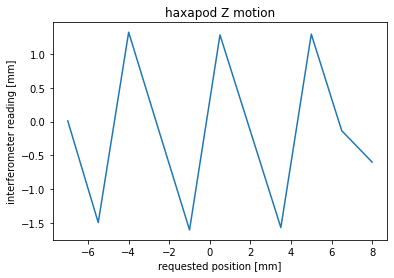

In [61]:
plt.plot(zs_mm,zs_readings_mm)
plt.title('haxapod Z motion')
plt.xlabel('requested position [mm]')
plt.ylabel('interferometer reading [mm]')
plt.show()


In [62]:
z_end_pm = epics.caget('BL531:PS:POS_0')

In [63]:
z_end_pm-z_start_pm

-607489271